#**Анализ заработной платы в России с 2000 года по 2023 год**

# **1. Считывание данных**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Считаем файл "Среднемесячной номинальной начисленной заработной платы работников организаций по видам экономической деятельности в Российской Федерации за 2000-2023 гг."


Данные взяты с официального сайта Федеральной службы государственной статистики: https://rosstat.gov.ru/labor_market_employment_salaries

По причине разбиения данных на два временных отрезка и представления их на разных страницах, произведем постраничное чтение данных. Далее выберем три вида деятельности, из данных по которым создадим небольшой датасет.

In [2]:
url_salaries = 'https://github.com/dsdaria/InflationAnalyze/raw/main/salaries.xlsx'
df_2000_2016 = pd.read_excel(url_salaries, sheet_name="2000-2016 гг.")
df_2017 = pd.read_excel(url_salaries, sheet_name="с 2017 г.")

Выберем три вида экономической деятельности:

1.   Строительство
2.   Гостиницы
3.   Образование


Так как строки с данными могут быть названы несколькими разными способами, используем ключевые слова для выявления необходимой информации. С помощью Excel проверено, что они достоверно соответствуют только заявленным видам деятельности.

Для считывания используем функцию reading_info, которой передается массив из ключевых слов и датафрейм, из которого берется необходимая информация. Далее сформируем новый датафрейм с данными по выбранным видам деятельности за каждый год в период с 2000 по 2023 г.

In [3]:
def reading_info(target, data_):
  ret_data = []
  for i in range(len(target)):
    for index, row in data_.iterrows():
      if str(target[i]).lower() in str(row[0]).lower().strip() :
        ret_data.append(row.to_list())
  return ret_data

In [4]:
years = [int(i) for i in range(2000, 2024)]
work_names = ["Строительство", "Гостини", "Образование"]

In [5]:
date_2000 = ['type'] + [int(i) for i in range(2000, 2017)]
data_2000 = pd.DataFrame(reading_info(work_names, df_2000_2016), columns=date_2000)

date_2016 = ['type'] + [int(i) for i in range(2017, 2024)]
data_2016 = pd.DataFrame(reading_info(work_names, df_2017), columns=date_2016)

data_for_df = pd.merge(data_2000.iloc[:, 1:], data_2016.iloc[:, 1:], left_index=True, right_index=True)
labels = ["Строительство", "Гостиничный бизнес и общественное питание", "Образование"]
data_for_df.index = labels

In [6]:
data_for_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
Гостиничный бизнес и общественное питание,1640.0,2403.6,3039.3,3966.7,4737.3,6033.4,7521.7,9339.0,11536.2,12469.6,...,19759.0,20626.0,22041.0,23970.5,26241.0,28191.4,27411.0,33224.7,37571.7,43191.8
Образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,...,25862.0,26928.0,28088.0,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7


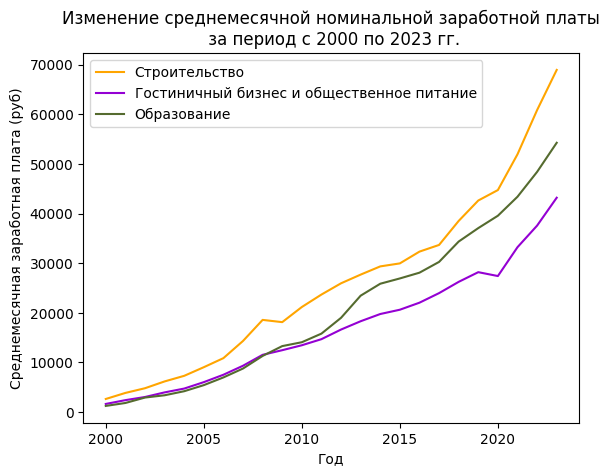

In [7]:
plt.plot(years, data_for_df.iloc[0], color="orange")
plt.plot(years, data_for_df.iloc[1], color="darkviolet")
plt.plot(years, data_for_df.iloc[2], color="darkolivegreen")
plt.title('''Изменение среднемесячной номинальной заработной платы\n за период с 2000 по 2023 гг.''')
plt.xlabel('Год')
plt.ylabel('Среднемесячная заработная плата (руб)')
plt.legend(['Строительство', 'Гостиничный бизнес и общественное питание', 'Образование'], loc='best')
plt.show()

**Вывод:** в общем случае наблюдается рост среднемесячной номинальной заработной платы за период с 2000 года по 2023 год за исключением некоторых малозначительных колебаний в отдельных отраслях.


Теперь необходимо рассмотреть изменение заработной платы с учетом инфляции.

# **2. Инфляция**

***Инфляция*** — это темп устойчивого повышения общего уровня цен на товары и услуги за определенный промежуток времени, также инфляция показывает степень обесценивания денег.

Чаще всего инфляцию принято указывать в годовом выражении, или, как еще говорят, год к году. Так, если инфляция в годовом выражении составила 8,4%, то имеют в виду, что набор одних и тех же товаров, который год назад стоил ₽100, сейчас стоит ₽108,4. Соответственно, ₽100 обесценились или потеряли покупательную способность на 8,4%. Это и есть инфляция. В России помимо годовой инфляции, Росстат измеряет еженедельную и ежемесячную.

Подробнее на РБК:
https://quote.rbc.ru/news/article/61e13fa79a79478207047ffc?from=copy


Полученные данные об инфляции с сайта
<https://уровень-инфляции.рф/таблицы-инфляции>

Сохраним "вручную" все данные в таблицу excel, далее выгрузим ее и выберем данные за каждый год в период с 2000 по 2023 гг.


In [8]:
url_inf = "https://github.com/dsdaria/InflationAnalyze/raw/main/inflation.xlsx"
inflation = pd.read_excel(url_inf, sheet_name="инфляция")

In [9]:
year_inflation=[float(i) for i in inflation["Всего"][1:25].to_list()][::-1]

inflation_df = pd.DataFrame(data=year_inflation, columns=["Инфляция за год"])
inflation_df.index = years

**Виды инфляции по темпу роста**:

*Низкая* — до 6% в год.

*Умеренная* — от 6 до 10% в год.

*Высокая (галопирующая)* — от 10 до 100% в год.

*Гиперинфляция* — цены растут на сотни и тысячи процентов.

In [10]:
def infaltion_type(year_inf):
  if year_inf < 6:
    return "низкая"
  elif 6 <= year_inf < 10:
    return "умеренная"
  elif 10 <= year_inf < 100:
    return "высокая"
  elif year_inf > 0:
    return "гиперинфляция"
  else:
    return "дефляция"


In [11]:
inflation_df["Вид инфляции по тему роста"] = [infaltion_type(i) for i in inflation_df["Инфляция за год"]]

In [12]:
inflation_df

,Инфляция за год,Вид инфляции по тему роста
2000,20.20,высокая
2001,18.58,высокая
2002,15.06,высокая
2003,11.99,высокая
2004,11.74,высокая
2005,10.91,высокая
2006,9.00,умеренная
2007,11.87,высокая
2008,13.28,высокая
2009,8.80,умеренная


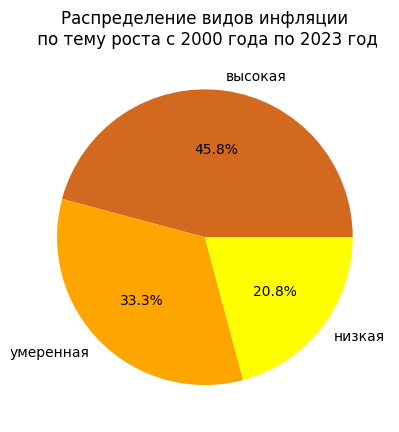

In [13]:
labels = ['высокая', 'умеренная', 'низкая'] #, 'гиперинфляция', 'дефляция']
sizes = [inflation_df['Вид инфляции по тему роста'].value_counts()[labels[i]] for i in range(len(labels))]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["chocolate", "orange", "yellow"]);
plt.title("Распределение видов инфляции\n по тему роста с 2000 года по 2023 год")
plt.show()

**Вывод:** практически в течение 12 лет (необязательно подряд идущих) в России наблюдалась высокая инфляция, низкая же встречалась лишь 5 раз из 24.

Рассмотрим, как менялась годовая инфляция за данный период времени.

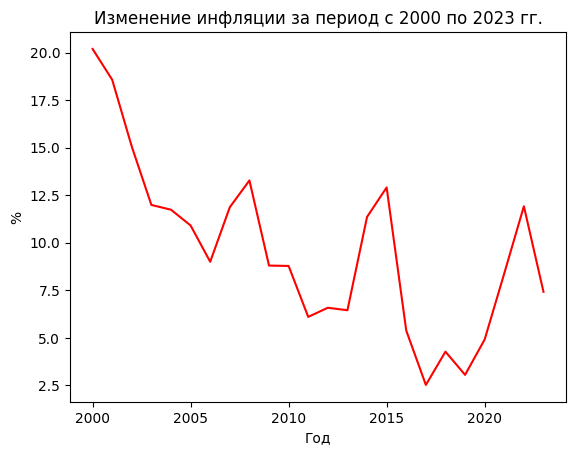

In [14]:
plt.plot(years, year_inflation, color="red")
plt.title('''Изменение инфляции за период с 2000 по 2023 гг.''')
plt.xlabel('Год')
plt.ylabel('%')
plt.show()

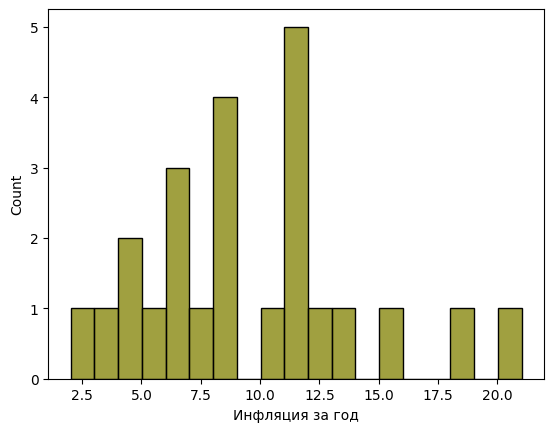

In [15]:
sns.histplot(data=inflation_df, x="Инфляция за год", bins=len(inflation_df), discrete=True, color='olive');
plt.show()

Как видно из линейного графика и гистограммы, инфляция в России принимает в основном различные значения, начиная с 2000 года наблюдалось ее снижение, хотя и с колебаниями. В большинстве случаев (в 19 из 24) она не превышает 12%.




# **3. Накопленная инфляция**

***Накопленная инфляция*** - это изменение уровня цен на услуги и товары за определенный период времени (чаще годы).

Под "инфляцией" обычно понимается рост цен относительно прошлого года. Однако в прошлогодний уровень включается инфляция предыдущего года и далее рекурсивно. Такой процесс в банковском деле называется сложным процентом, а в экономике — накопленной инфляцией.

Формула накопленной инфляции:


\begin{align}
        S = P * \prod_{k = 1}^{n}(1 + \frac{i_k}{100})
\end{align}


$S$ - цена или заработная плата через k лет с учетом накопленной инфляции \\
$P$ - первоначальная цена или заработная плата \\
$k$ - год в рассматриваемом промежутке: первый из временного отрезка обозначим через 1, а последний - через $n$ \\
$i_{k}$ - инфляция в $k$-ый год \\



Для анализа в контексте данной задачи возьмем значения среднемесячных номинальных заработных плат для каждой анализируемой деятельности в 2000 году и найдем значения $S_{k}$ для каждого года и построим графики, сравнив с изменениями номинальных показателей для каждого года.

In [16]:
data = data_for_df.to_numpy()

Используем для этого функцию cumulative_inflation_rates, которой в качестве параметров передается заработная плата в год, относительно которого проводятся вычисления, и массив, состоящий из инфляции за каждый год.


In [17]:
def cumulative_inflation_rates(start_year_salary, inflation):
  cum_inf_data = []
  local_inf = start_year_salary
  for i in range(len(inflation)):
    local_inf = local_inf * (1 + inflation[i]/100)
    cum_inf_data.append(local_inf)
  return cum_inf_data


In [18]:
cum_inf_construction = cumulative_inflation_rates(data[0][0], year_inflation)
cum_inf_hotels = cumulative_inflation_rates(data[1][0], year_inflation)
cum_inf_education = cumulative_inflation_rates(data[2][0], year_inflation)

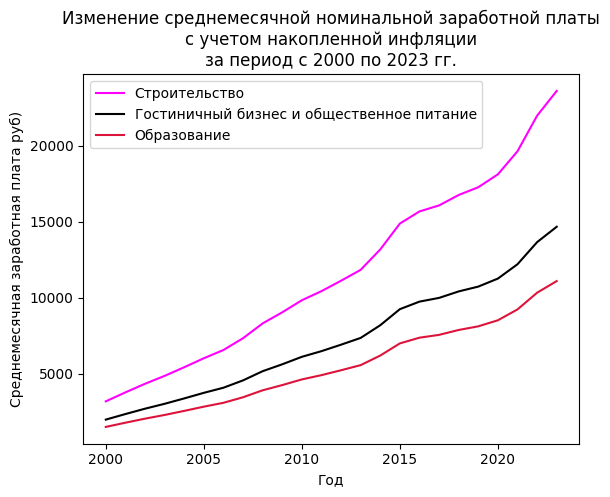

In [19]:
plt.plot(years, cum_inf_construction, color='magenta')
plt.plot(years, cum_inf_hotels, color='black')
plt.plot(years, cum_inf_education, color='crimson')
plt.title('Изменение среднемесячной номинальной заработной платы' + '\n' + 'c учетом накопленной инфляции' + '\n' + 'за период с 2000 по 2023 гг.')
plt.xlabel('Год')
plt.ylabel('Среднемесячная заработная плата руб)')
plt.legend (('Строительство', 'Гостиничный бизнес и общественное питание', 'Образование'), loc='best')
plt.show()

In [20]:
def plot_cumulative_inflation_rates(nominal_data, cum_inf_industry, colors, lable):
  plt.plot(years, nominal_data, color=colors[0])
  plt.plot(years, cum_inf_industry, color=colors[1])
  plt.title(f'''Номинальная среднемесячная заработная плата \n vs заработная плата с накопленной инфляцией\n за период с 2000-2023 гг.\n в отрасли {lable}''')
  plt.xlabel('Год')
  plt.ylabel('Среднемесячная заработная плата (руб)')
  plt.legend(('Номинальная заработная плата', 'Заработная плата с накопленной инфляцией'), loc='best')
  plt.show()

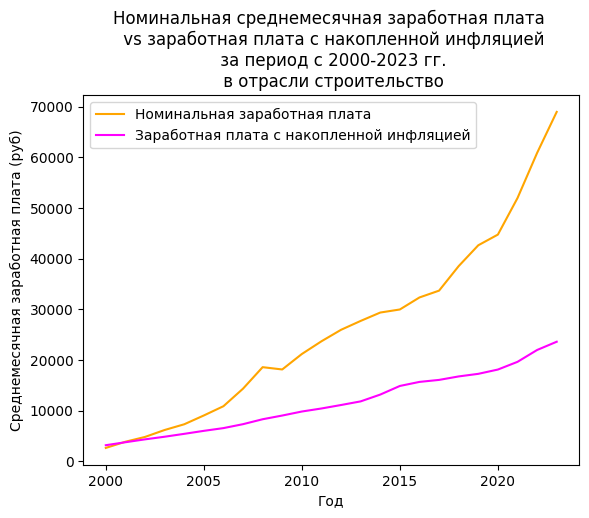

In [21]:
plot_cumulative_inflation_rates(data[0], cum_inf_construction, ["orange", "magenta"], "строительство")

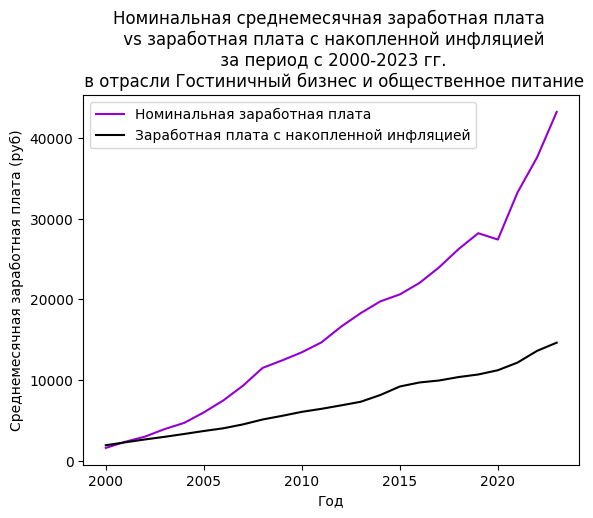

In [22]:
plot_cumulative_inflation_rates(data[1], cum_inf_hotels, ["darkviolet", "black"], "Гостиничный бизнес и общественное питание")

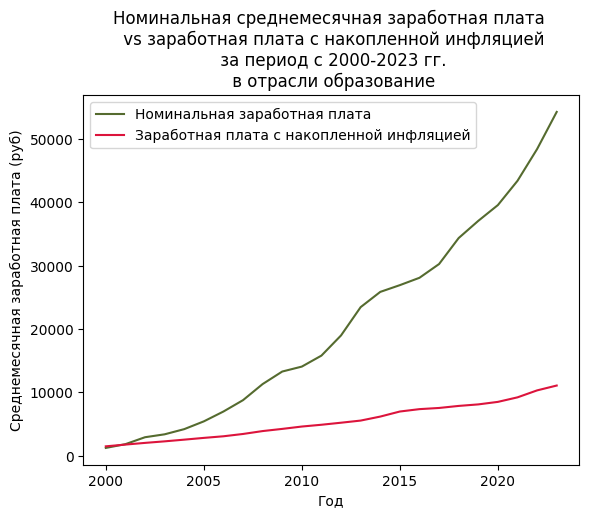

In [23]:
plot_cumulative_inflation_rates(data[2], cum_inf_education, ["darkolivegreen", "crimson"], "образование")

**Вывод:** Доход, полученный через 23 года по расчетам накопленной инфляции, растет, как и средний номинальный заработок.

# **4. Расчет реальной заработной платы**

***Реальный доход*** — доход, отражающий реальную покупательную способность денег, полученный с учетом инфляции.

Для того, чтобы найти реальный доход за каждый год, необходимо номинальный доход  этого года разделить на индекс инфляции:

\begin{align}
        P = \dfrac{S}{I}
\end{align}


*Индекс инфляции:*





\begin{align}
         I = 1 + \frac{i}{100}
\end{align}

Также можно провести расчеты с помощью другой формулы:





\begin{align}
        P = S * (1 - \frac{i}{100})
\end{align}


В обоих случаях: \\
$P$ - реальный доход \\
$S$ - номинальный доход \\
$i$ - инфляция в рассматриваемый год \\



Используя данные о инфляции за каждый год, найдем коэффициенты инфляции:

In [24]:
def infaltion_coef(inf):
  return 1 + inf / 100

In [25]:
year_inflation_coef = []
for i in year_inflation:
  year_inflation_coef.append(infaltion_coef(i))

In [26]:
df_inflation_coef = pd.DataFrame(data=year_inflation_coef, columns=["Коэффициент инфляции за год"])
df_inflation_coef.index = years

In [27]:
df_inflation_coef

,Коэффициент инфляции за год
2000,1.2020
2001,1.1858
2002,1.1506
2003,1.1199
2004,1.1174
2005,1.1091
2006,1.0900
2007,1.1187
2008,1.1328
2009,1.0880


In [28]:
infaltion_coef_div = []
for i in year_inflation:
  infaltion_coef_div.append( 1 - i / 100)

In [29]:
real_income_building = np.multiply(data[0], infaltion_coef_div)
real_income_hotels = np.multiply(data[1], infaltion_coef_div)
real_income_education =  np.multiply(data[2], infaltion_coef_div)

In [30]:
df_inflation_coef['Реальный доход в строительстве'] = real_income_building
df_inflation_coef['Реальный доход в гостиничном бизнесе и общественном питании']= real_income_hotels
df_inflation_coef['Реальный доход в образовании'] = real_income_education

In [31]:
df_inflation_coef

,Коэффициент инфляции за год,Реальный доход в строительстве,Реальный доход в гостиничном бизнесе и общественном питании,Реальный доход в образовании
2000,1.2020,2106.56040,1308.72000,989.67960
2001,1.1858,3142.24206,1957.01112,1492.42860
2002,1.1506,4082.98086,2581.58142,2486.44862
2003,1.1199,5436.11367,3491.09267,2980.54666
2004,1.1174,6447.12822,4181.14098,3709.92084
2005,1.1091,8056.23052,5375.15606,4837.31973
2006,1.0900,9890.97200,6844.74700,6354.80300
2007,1.1187,12632.02542,8230.46070,7736.31579
2008,1.1328,16107.37280,10004.19264,9813.92896
2009,1.0880,16527.44640,11372.27520,12123.76320


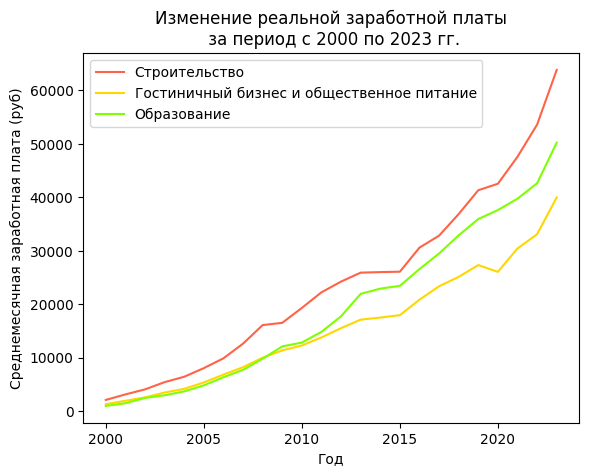

In [32]:
plt.plot(years, df_inflation_coef['Реальный доход в строительстве'], color="tomato")
plt.plot(years, df_inflation_coef['Реальный доход в гостиничном бизнесе и общественном питании'], color="gold")
plt.plot(years, df_inflation_coef['Реальный доход в образовании'], color="chartreuse")
plt.title('''Изменение реальной заработной платы\n за период с 2000 по 2023 гг.''')
plt.xlabel('Год')
plt.ylabel('Среднемесячная заработная плата (руб)')
plt.legend(['Строительство', 'Гостиничный бизнес и общественное питание', 'Образование'], loc='best')
plt.show()

In [33]:
def income_compare(nominal_data, cum_inf_industry, real_income, colors, lable):
  plt.plot(years, nominal_data, color=colors[0])
  plt.plot(years, cum_inf_industry, color=colors[1])
  plt.plot(years, real_income, color=colors[2])

  plt.title(f'''Сравнение заработной платы в в отрасли {lable} за период 2000-2023 гг.''')
  plt.xlabel('Год')
  plt.ylabel('Среднемесячная заработная плата (руб)')
  plt.legend(('Номинальная заработная плата', 'Заработная плата с накопленной инфляцией', 'Реальная заработная плата'), loc='best')
  plt.show()

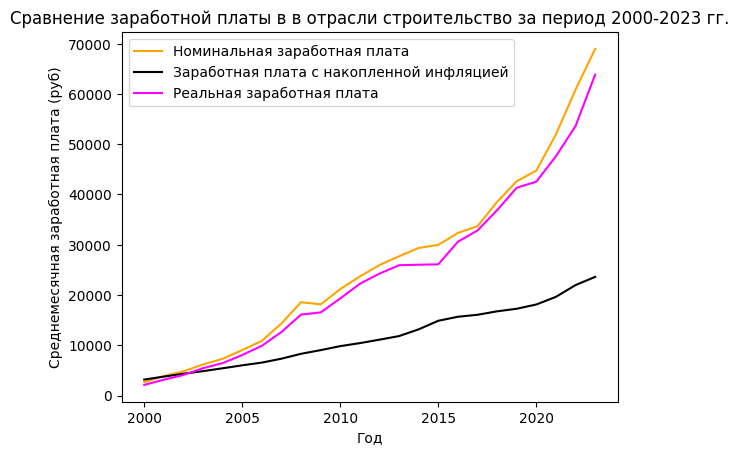

In [34]:
income_compare(data[0], cum_inf_construction, real_income_building, ["orange", "black", "magenta"], "строительство")

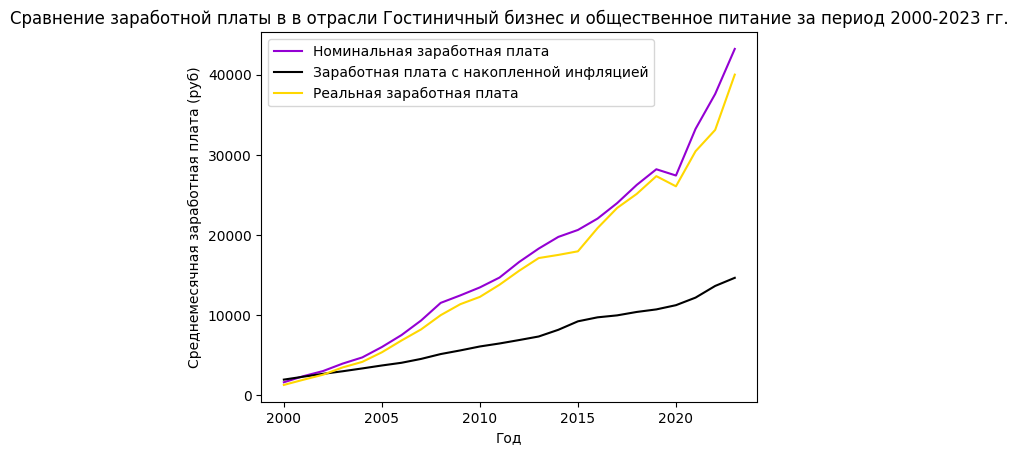

In [35]:
income_compare(data[1], cum_inf_hotels, real_income_hotels, ["darkviolet", "black", "gold"], "Гостиничный бизнес и общественное питание")

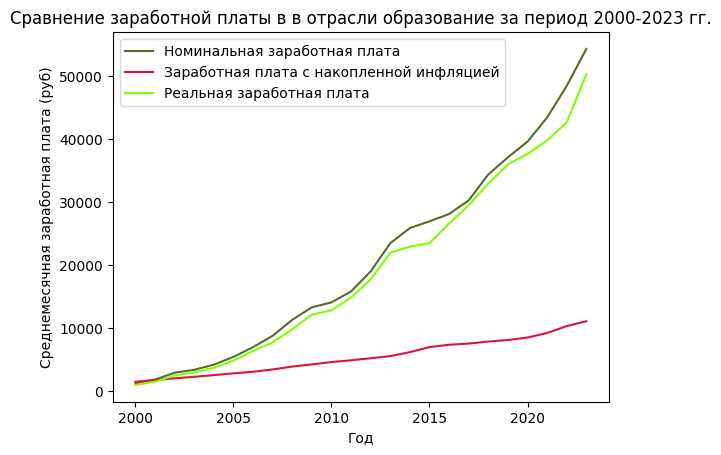

In [36]:
income_compare(data[2], cum_inf_education, real_income_education, ["darkolivegreen", "crimson", "chartreuse"], "образование")

**Вывод:** как видно из вышепредставленных графиков, несмотря на наличие инфляции более 10% в течение 17 лет, реальные доходы в рассматриваемых отраслях растут.

# **5. Связь заработной платы и демографических показателей**

В дополнение рассмотрим связь (определим, существует ли она вообще) ВВП на душу населения и некоторых демографических показателей на уровень реальных заработных плат*. Представим изменения с помощью графиков. Все данные взяты с официального сайта Росстата. По причине наличия однородных данных с 2009 года, рассмотрим временной отрезок с 2009 года по 2022 год. Данные вручную были добавлены в таблицу excel из разных таблиц, ссылки на которые приведены ниже.
План работы:
1. Выгрузить датафрейм
2. Объединить его с имеющимися данными
3. Построить графическое изображение зависимостей
4. Определить по полученным значениям существование зависимостей  между показателями.

Для анализа были выбраны следующие показатели:
1. ВВП на душу населения
2. Численность населения
3. Численность городского населения
4. Численность сельского населения
5. Уровень безработицы, %
6. Уровень безработицы среди мужчин, %
7. Уровень безработицы среди женщин, %

***Валово́й вну́тренний проду́кт (англ. gross domestic product), общепринятое сокращение — ВВП (англ. GDP)***— макроэкономический показатель, отражающий рыночную стоимость всех конечных товаров и услуг (то есть предназначенных для непосредственного употребления, использования или применения), произведённых за год во всех отраслях экономики на территории конкретного государства для потребления, экспорта и накопления, вне зависимости от национальной принадлежности использованных факторов производства.

Источник: <https://ru.wikipedia.org/wiki/Валовой_внутренний_продукт>




In [37]:
url_index = 'https://github.com/dsdaria/InflationAnalyze/raw/main/additional.xlsx'
index = pd.read_excel(url_index, index_col=None)

In [38]:
inf_data_df_ = df_inflation_coef[9:-1:].T
inf_data_df_["Показатель"] = inf_data_df_.index

In [39]:
glb_data = pd.concat([inf_data_df_, index][::-1], axis=0)
glb_data = glb_data.reset_index()
glb_data = glb_data.drop(['index'], axis=1)

**Примечание:** здесь и далее под "ВВП" подразумевается ВВП на душу населения.





In [40]:
glb_data

,Показатель,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ВВП,271787.118542,324177.204426,420324.147126,474990.844528,507530.178546,539424.119589,565361.826874,580916.039393,621870.533299,702627.739219,741097.431965,728860.204383,922263.979133,1.058867e+06
1,Население,142.700000,142.900000,142.900000,143.000000,143.300000,143.700000,146.300000,146.500000,146.800000,146.900000,146.800000,146.700000,146.200000,1.470000e+02
2,Городское население,104.900000,105.300000,105.400000,105.700000,106.100000,106.600000,108.300000,108.600000,109.000000,109.300000,109.500000,109.500000,109.300000,1.100000e+02
3,Сельское население,37.800000,37.600000,37.500000,37.300000,37.200000,37.100000,38.000000,37.900000,37.800000,37.600000,37.300000,37.200000,36.900000,3.700000e+01
4,"Уровень безработицы, %",8.301454,7.345418,6.495730,5.458343,5.500000,5.200000,5.600000,5.537196,5.200000,4.800000,4.595382,5.767663,4.800000,3.938199e+00
5,"Уровень безработицы среди мужчин, %",8.909221,7.860832,6.932708,5.810785,5.800000,5.500000,5.800000,5.747926,5.400000,4.900000,4.761748,5.818012,4.700000,3.845200e+00
6,"Уровень безработицы среди женщин, %",7.672305,6.805918,6.039250,5.089071,5.200000,4.800000,5.300000,5.313407,5.000000,4.700000,4.419397,5.714599,4.900000,4.035939e+00
7,Коэффициент инфляции за год,1.088000,1.087800,1.061000,1.065800,1.064500,1.113600,1.129100,1.053800,1.025200,1.042700,1.030500,1.049100,1.083900,1.119200e+00
8,Реальный доход в строительстве,16527.446400,19312.824740,22237.398000,24243.050520,25914.659700,26019.385600,26092.164000,30592.538400,32829.216920,36873.281400,41329.688050,42541.364200,47586.081620,5.359624e+04
9,Реальный доход в гостиничном бизнесе и обществ...,11372.275200,12283.502760,13796.257500,15536.773620,17123.766200,17514.377600,17963.183400,20855.194200,23366.443400,25120.509300,27331.562300,26065.119900,30437.147670,3.309315e+04


In [41]:
years_comp = [int(i) for i in range(2009, 2022+1)]

In [42]:
glb_data.index = glb_data["Показатель"]
glb_data = glb_data.T
glb_data = glb_data.drop(['Показатель'])
glb_data

Показатель,ВВП,Население,Городское население,Сельское население,"Уровень безработицы, %","Уровень безработицы среди мужчин, %","Уровень безработицы среди женщин, %",Коэффициент инфляции за год,Реальный доход в строительстве,Реальный доход в гостиничном бизнесе и общественном питании,Реальный доход в образовании
2009,271787.118542,142.7,104.9,37.8,8.301454,8.909221,7.672305,1.088,16527.4464,11372.2752,12123.7632
2010,324177.204426,142.9,105.3,37.6,7.345418,7.860832,6.805918,1.0878,19312.82474,12283.50276,12839.39744
2011,420324.147126,142.9,105.4,37.5,6.49573,6.932708,6.03925,1.061,22237.398,13796.2575,14844.7449
2012,474990.844528,143.0,105.7,37.3,5.458343,5.810785,5.089071,1.0658,24243.05052,15536.77362,17745.40926
2013,507530.178546,143.3,106.1,37.2,5.5,5.8,5.2,1.0645,25914.6597,17123.7662,21944.86545
2014,539424.119589,143.7,106.6,37.1,5.2,5.5,4.8,1.1136,26019.3856,17514.3776,22924.0768
2015,565361.826874,146.3,108.3,38.0,5.6,5.8,5.3,1.1291,26092.164,17963.1834,23451.5952
2016,580916.039393,146.5,108.6,37.9,5.537196,5.747926,5.313407,1.0538,30592.5384,20855.1942,26576.8656
2017,621870.533299,146.8,109.0,37.8,5.2,5.4,5.0,1.0252,32829.21692,23366.4434,29495.10848
2018,702627.739219,146.9,109.3,37.6,4.8,4.9,4.7,1.0427,36873.2814,25120.5093,32893.7853


***Изменение численности населения и уровень безработицы в России с 2009 года по 2022 год"***

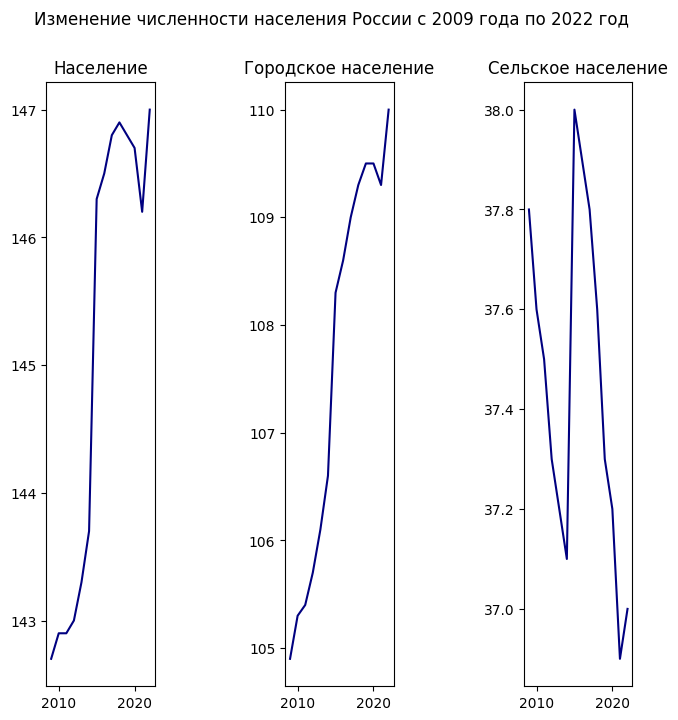

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 8));
fig.tight_layout(pad=6);
fig.suptitle('Изменение численности населения России с 2009 года по 2022 год')
ax1.plot(glb_data["Население"], color="navy")
ax1.set_title("Население");
ax1.set_title("Население");
ax2.plot(glb_data["Городское население"], color="navy")
ax2.set_title("Городское население");
ax3.plot(glb_data["Сельское население"], color="navy")
ax3.set_title("Сельское население");

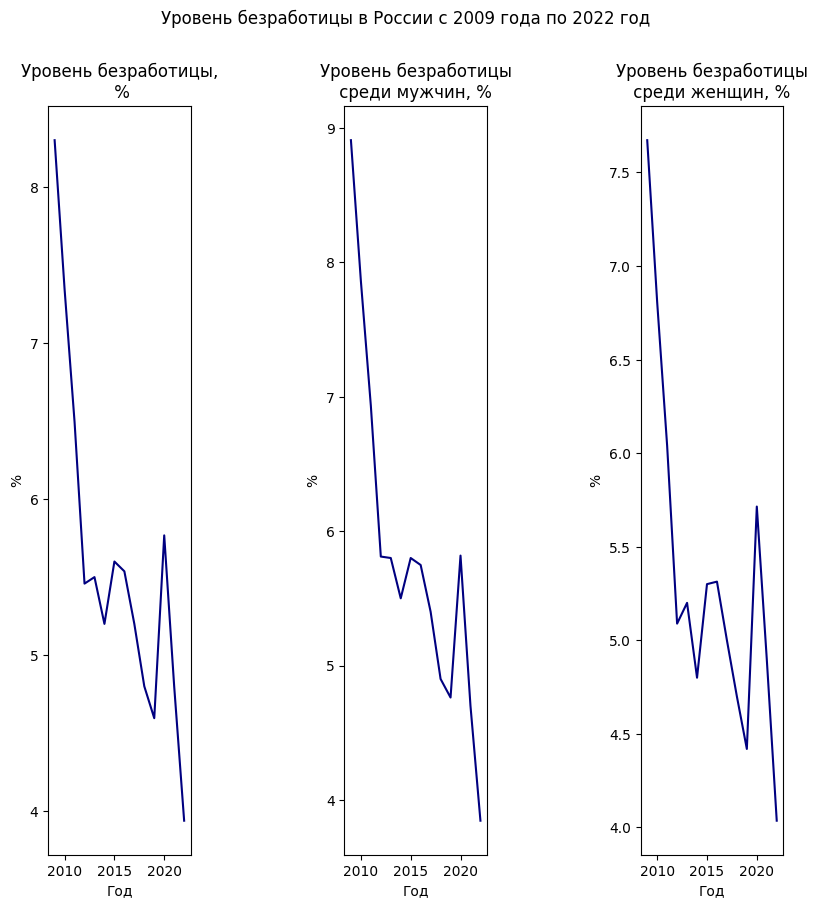

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10));
fig.tight_layout(pad=8);
fig.suptitle('Уровень безработицы в России с 2009 года по 2022 год');

ax1.plot(glb_data["Уровень безработицы, % "], color="navy");
ax1.set_title("Уровень безработицы,\n %");
ax1.set_xlabel('Год');
ax1.set_ylabel('%');

ax2.plot(glb_data["Уровень безработицы среди мужчин, % "], color="navy")
ax2.set_title("Уровень безработицы\n среди мужчин, % ");
ax2.set_xlabel('Год');
ax2.set_ylabel('%');

ax3.plot(glb_data["Уровень безработицы среди женщин, % "], color="navy");
ax3.set_title("Уровень безработицы\n среди женщин, % ");
ax3.set_xlabel('Год');
ax3.set_ylabel('%');

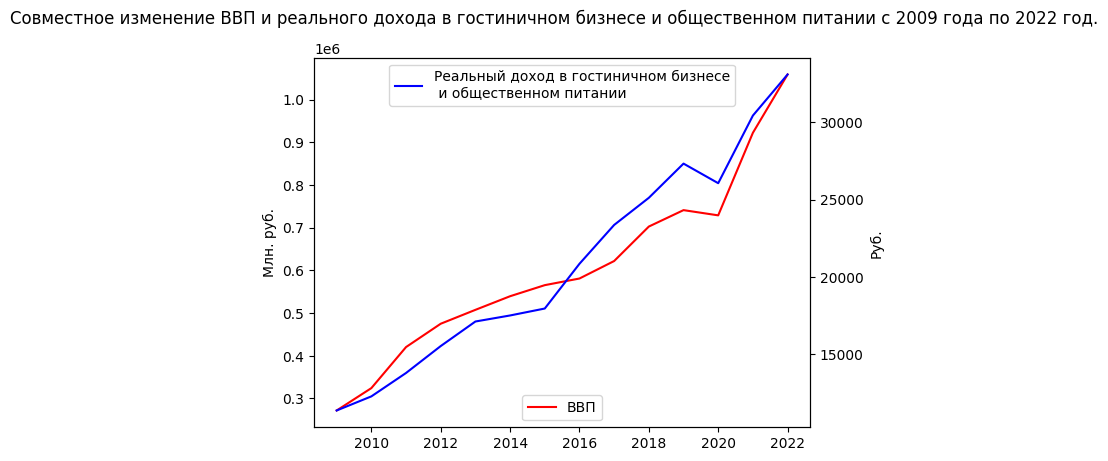

In [45]:
fig, ax = plt.subplots();
fig.suptitle("Совместное изменение ВВП и реального дохода в гостиничном бизнесе и общественном питании с 2009 года по 2022 год.");
ax1 = ax.twinx();
ax.plot(years_comp, glb_data['ВВП'], color='r', label="ВВП");
ax1.plot(years_comp, glb_data['Реальный доход в гостиничном бизнесе и общественном питании'], color='b', label="Реальный доход в гостиничном бизнесе\n и общественном питании");
ax.set_ylabel('Млн. руб.');
ax.legend(loc='lower center');
ax1.legend(loc='upper center');
ax1.set_ylabel('Руб.');

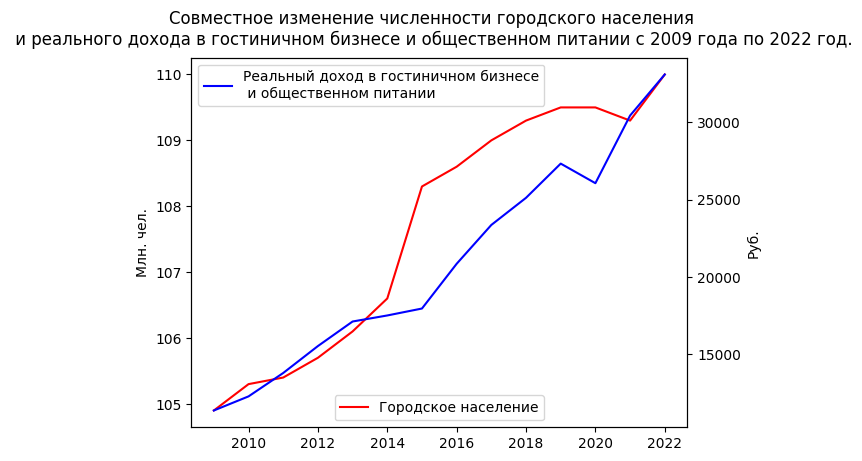

In [46]:
fig, ax = plt.subplots();
ax1 = ax.twinx();
fig.suptitle("Совместное изменение численности городского населения\n и реального дохода в гостиничном бизнесе и общественном питании с 2009 года по 2022 год.");
ax.plot(years_comp, glb_data['Городское население'], color='r', label="Городское население");
ax1.plot(years_comp, glb_data['Реальный доход в гостиничном бизнесе и общественном питании'], color='b', label="Реальный доход в гостиничном бизнесе\n и общественном питании");
ax.set_ylabel('Млн. чел.');
ax.legend(loc='lower center');
ax1.legend(loc='upper left');
ax1.set_ylabel('Руб.');

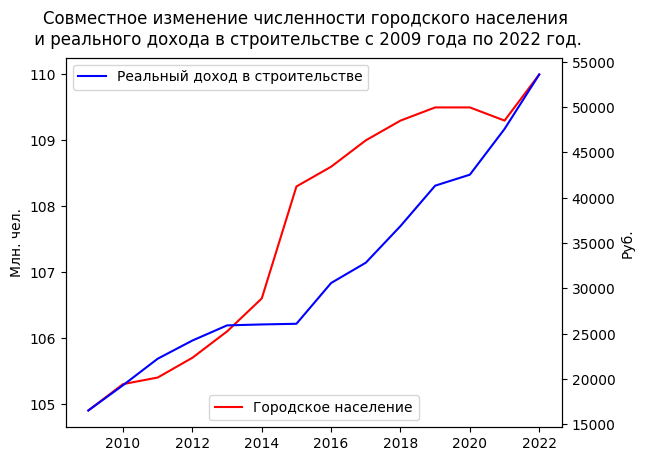

In [47]:
fig, ax = plt.subplots();
ax1 = ax.twinx();
fig.suptitle("Совместное изменение численности городского населения\n и реального дохода в строительстве с 2009 года по 2022 год.");
ax.plot(years_comp, glb_data['Городское население'], color='r', label="Городское население");
ax1.plot(years_comp, glb_data['Реальный доход в строительстве'], color='b', label="Реальный доход в строительстве");
ax.set_ylabel('Млн. чел.');
ax.legend(loc='lower center');
ax1.legend(loc='best');
ax1.set_ylabel('Руб.');

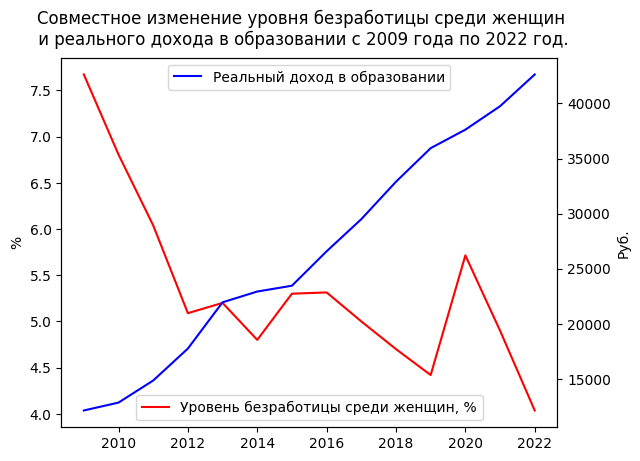

In [48]:
fig, ax = plt.subplots();
ax1 = ax.twinx();
fig.suptitle("Совместное изменение уровня безработицы среди женщин\n и реального дохода в образовании с 2009 года по 2022 год.");
ax.plot(years_comp, glb_data['Уровень безработицы среди женщин, % '], color='r', label="Уровень безработицы среди женщин, %");
ax1.plot(years_comp, glb_data['Реальный доход в образовании'], color='b', label="Реальный доход в образовании");
ax.set_ylabel('%');
ax.legend(loc='lower center');
ax1.legend(loc='upper center');
ax1.set_ylabel('Руб.');

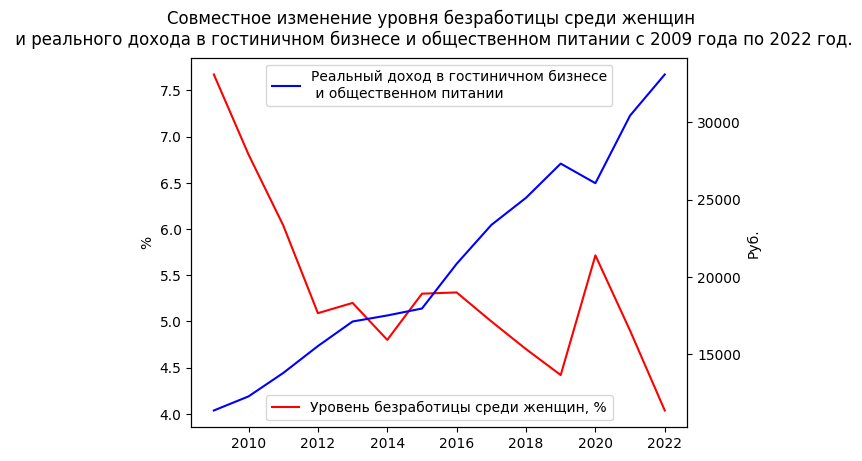

In [49]:
fig, ax = plt.subplots();
ax1 = ax.twinx();
fig.suptitle("Совместное изменение уровня безработицы среди женщин\n и реального дохода в гостиничном бизнесе и общественном питании с 2009 года по 2022 год.");
ax.plot(years_comp, glb_data['Уровень безработицы среди женщин, % '], color='r', label="Уровень безработицы среди женщин, %");
ax1.plot(years_comp, glb_data['Реальный доход в гостиничном бизнесе и общественном питании'], color='b', label="Реальный доход в гостиничном бизнесе\n и общественном питании");
ax.set_ylabel('%');
ax.legend(loc='lower center');
ax1.legend(loc='upper center');
ax1.set_ylabel('Руб.');

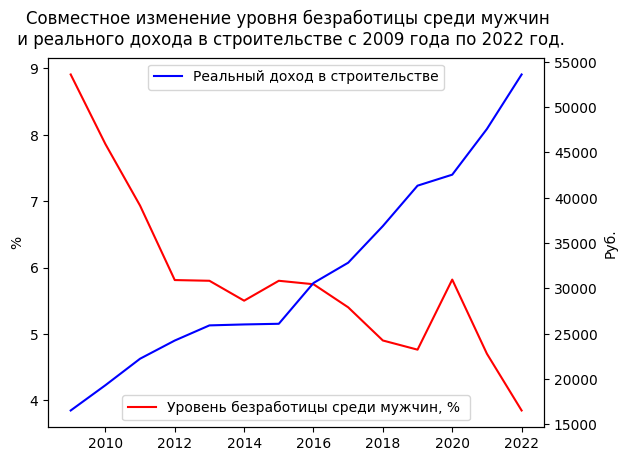

In [50]:
fig, ax = plt.subplots();
ax1 = ax.twinx();
fig.suptitle("Совместное изменение уровня безработицы среди мужчин\n и реального дохода в строительстве с 2009 года по 2022 год.");
ax.plot(years_comp, glb_data['Уровень безработицы среди мужчин, % '], color='r', label="Уровень безработицы среди мужчин, % ");
ax1.plot(years_comp, glb_data['Реальный доход в строительстве'], color='b', label="Реальный доход в строительстве");
ax.set_ylabel('%');
ax.legend(loc='lower center');
ax1.legend(loc='upper center');
ax1.set_ylabel('Руб.');

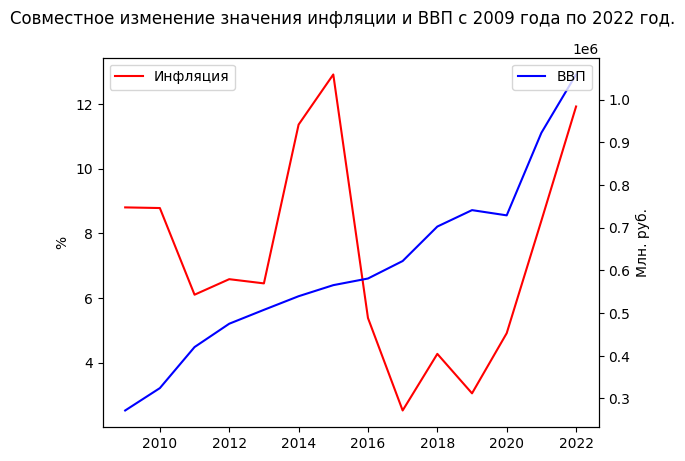

In [51]:
fig, ax = plt.subplots();
ax1 = ax.twinx();
fig.suptitle("Совместное изменение значения инфляции и ВВП с 2009 года по 2022 год.");
ax.plot(years_comp, inflation_df["Инфляция за год"][9:-1], color='r', label="Инфляция");
ax1.plot(years_comp, glb_data['ВВП'], color='b', label="ВВП");
ax.set_ylabel('%');
ax.legend(loc='upper left');
ax1.legend(loc='upper right');
ax1.set_ylabel('Млн. руб.');

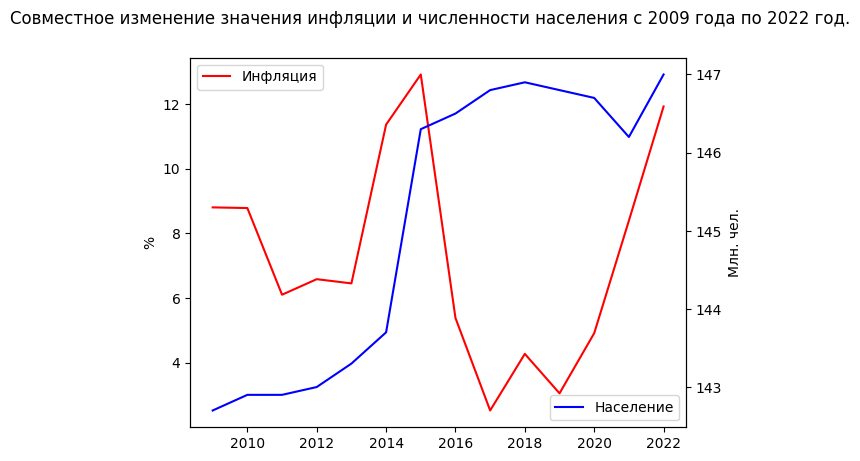

In [52]:
fig, ax = plt.subplots();
ax1 = ax.twinx();
fig.suptitle("Совместное изменение значения инфляции и численности населения с 2009 года по 2022 год.")
ax.plot(years_comp, inflation_df["Инфляция за год"][9:-1], color='r', label="Инфляция");
ax1.plot(years_comp, glb_data['Население'], color='b', label="Население");
ax.set_ylabel('%');
ax.legend(loc='upper left');
ax1.legend(loc='lower right');
ax1.set_ylabel('Млн. чел.');

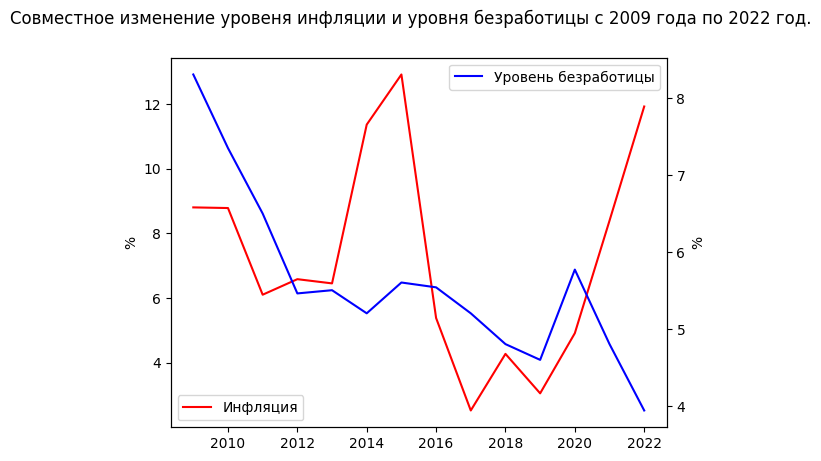

In [53]:
fig, ax = plt.subplots();
ax1 = ax.twinx();
fig.suptitle("Совместное изменение уровеня инфляции и уровня безработицы с 2009 года по 2022 год.");
ax.plot(years_comp, inflation_df["Инфляция за год"][9:-1], color='r', label="Инфляция");
ax1.plot(years_comp, glb_data['Уровень безработицы, % '], color='b', label="Уровень безработицы");
ax.set_ylabel('%');
ax.legend(loc='lower left');
ax1.legend(loc='upper right');
ax1.set_ylabel('%');

**Вывод:** как видно из графиков выше, при повышении реального дохода во всех трех рассматриваемых отраслях (образование, строительство, гостиничный бизнес и общественное питание), уровень безработицы снижается. Это можно объяснить тем, что в образовании и сфере обслуживания в основном задействованы женщины. Их привлекают растущие заработные платы, в связи с чем снижается процент безработных. В строительстве же работают преимущественно мужчины, которых также привлекают растущие зарплаты (процент безработных в данной демографической группе также снижается). Рост заработной платы в строительстве также можно объяснить спросом на жилье, так как число проживающих в сельской местности снижается, соответственно эти люди перебираются в города (городское население увеличивается). Соответственно нужны те, кто построит новые объекты жилья. Значения ВВП на душу населения и реальных заработных плат в гостиничном бизнесе и общественном питании растут вместе, так как данная деятельность относят к категории "услуги", которые в свою очередь увеличивают значение ВВП на душу населения.


***Четких связей выявлено не было.***



****Источники данных для выявления связи заработной платы и демографических показателей:***
1. Таблица "ВВП на душу населения":
  <https://rosstat.gov.ru/statistics/accounts> \\
2. Таблица "Численность населения":
  <https://rosstat.gov.ru/folder/12781> \\
3. Таблица "Индикаторы достойного труда": <https://rosstat.gov.ru/labor_market_employment_salaries>